<a href="https://colab.research.google.com/github/ftmhrahimi/Deep_Learning_F20_Assignments/blob/master/Assignment_Set_4/v01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import libraries**

In [16]:
import torch
import numpy as np
from torch import nn
import matplotlib.pyplot as plt
from torch.utils import data
from torchvision import datasets, transforms

# **Tensor conversion, resizing, and normalization of the dataset**

In [17]:
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
                                transforms.Resize
                                ])

#**Download the data by Torchvision** 

In [18]:
df = datasets.FashionMNIST('data/', download=True, transform=transform)

Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw


Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw
Processing...
Done!


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:469: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


# **Split the data into two parts (training and test with a ratio of 70/30)**

In [19]:
train_dataset, test_dataset = torch.utils.data.dataset.random_split(df, [42000 ,18000])

In [20]:
train_loader = torch.utils.data.DataLoader(train_dataset,batch_size=64,shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset,batch_size=64,shuffle=True)

#Examine a sample

In [ ]:

dataiter = iter(train_loader)
(images , labels)=dataiter.next()
print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


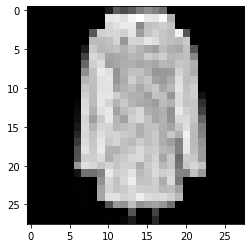

In [ ]:
plt.imshow(images[1].numpy().squeeze(), cmap = 'Greys_r')

# **nn.Sequential**

In [50]:
# Define the network architecture
from torch import nn, optim
import torch.nn.functional as F

model = nn.Sequential(nn.Linear(784, 256),
                      nn.ReLU(),

                      
                      nn.Linear(256, 128),
                      nn.Softmax(),

                      
                      nn.Linear(128, 64),
                      nn.Sigmoid(),

                      
                      nn.Linear(64, 32),
                      nn.ReLU(),

                      nn.Linear(32, 10),
                      nn.LogSoftmax(dim = 1)


                     )
model=model.cuda()
                
print(model)


Sequential(
  (0): Linear(in_features=784, out_features=256, bias=True)
  (1): ReLU()
  (2): Linear(in_features=256, out_features=128, bias=True)
  (3): Softmax(dim=None)
  (4): Linear(in_features=128, out_features=64, bias=True)
  (5): Sigmoid()
  (6): Linear(in_features=64, out_features=32, bias=True)
  (7): ReLU()
  (8): Linear(in_features=32, out_features=10, bias=True)
  (9): LogSoftmax(dim=1)
)


In [52]:
# Define the loss
criterion = nn.NLLLoss()

# Define the optimizer
optimizer = optim.Adam(model.parameters(), lr = 0.002)

# Define the epochs
epochs = 30

train_losses, test_losses = [], []

for e in range(epochs):
  running_loss = 0
  for images, labels in train_loader:
    images, labels=images.cuda() , labels.cuda()
    images = images.view(images.shape[0], -1)
    
    # Training pass
    optimizer.zero_grad()
    
    output = model.forward(images)
    loss = criterion(output, labels)
    loss.backward()
    optimizer.step()
    
    running_loss += loss.item()
  else:
    test_loss = 0
    accuracy = 0
    
    # Turn off gradients for validation, saves memory and computation
    with torch.no_grad():
      # Set the model to evaluation mode
      model.eval()
      
      # Validation pass
      for images, labels in test_loader:
        images = images.view(images.shape[0], -1)
        log_ps = model(images)
        test_loss += criterion(log_ps, labels)
        
        ps = torch.exp(log_ps)
        top_p, top_class = ps.topk(1, dim = 1)
        equals = top_class == labels.view(*top_class.shape)
        accuracy += torch.mean(equals.type(torch.FloatTensor))
    
    model.train()
    train_losses.append(running_loss/len(train_loader))
    test_losses.append(test_loss/len(test_loader))
    
    print("Epoch: {}/{}..".format(e+1, epochs),
          "Training loss: {:.3f}..".format(running_loss/len(train_loader)),
          "Test loss: {:.3f}..".format(test_loss/len(test_loader)),
          "Test Accuracy: {:.3f}".format(accuracy/len(test_loader)))

/usr/local/lib/python3.6/dist-packages/torch/nn/modules/container.py:117: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


Epoch: 1/30.. Training loss: 1.344.. Test loss: 0.748.. Test Accuracy: 0.727
Epoch: 2/30.. Training loss: 0.609.. Test loss: 0.598.. Test Accuracy: 0.759
Epoch: 3/30.. Training loss: 0.475.. Test loss: 0.455.. Test Accuracy: 0.840
Epoch: 4/30.. Training loss: 0.411.. Test loss: 0.442.. Test Accuracy: 0.852
Epoch: 5/30.. Training loss: 0.380.. Test loss: 0.383.. Test Accuracy: 0.869
Epoch: 6/30.. Training loss: 0.353.. Test loss: 0.396.. Test Accuracy: 0.863
Epoch: 7/30.. Training loss: 0.338.. Test loss: 0.391.. Test Accuracy: 0.870
Epoch: 8/30.. Training loss: 0.325.. Test loss: 0.370.. Test Accuracy: 0.873
Epoch: 9/30.. Training loss: 0.316.. Test loss: 0.373.. Test Accuracy: 0.876
Epoch: 10/30.. Training loss: 0.301.. Test loss: 0.380.. Test Accuracy: 0.868
Epoch: 11/30.. Training loss: 0.294.. Test loss: 0.382.. Test Accuracy: 0.871
Epoch: 12/30.. Training loss: 0.287.. Test loss: 0.375.. Test Accuracy: 0.878
Epoch: 13/30.. Training loss: 0.280.. Test loss: 0.363.. Test Accuracy: 0

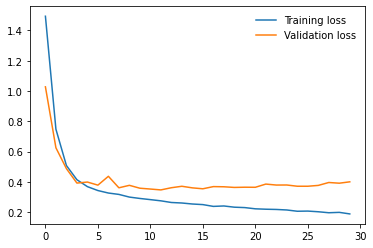

In [31]:
plt.plot(train_losses, label = "Training loss")
plt.plot(test_losses, label = "Validation loss")
plt.legend(frameon = False)

# **nn.module**

In [37]:
from torch import nn, optim
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear1 = nn.Linear(784, 256)
        self.linear2 = nn.Linear(256, 128)
        self.linear3 = nn.Linear(128, 64)
        self.linear4 = nn.Linear(64, 32)
        self.linear5 = nn.Linear(32, 16)
        self.linear6 = nn.Linear(16, 10)

        
        # Define activation 
        self.sigmoid = nn.Sigmoid()
        self.relu = nn.ReLU()
        self.softmax = nn.Softmax()
        self.softmax1 = nn.Softmax(dim=1)
        
    def forward(self, x):
        x = self.linear1(x)
        x = self.sigmoid(x)

        x = self.linear2(x)
        x = self.softmax(x)

        x = self.linear3(x)
        x = self.relu(x)

        x = self.linear4(x)
        x = self.relu(x)

        x = self.linear5(x)
        x = self.relu(x)

        x = self.linear6(x)
        x = self.softmax1(x)
        
        return x

In [38]:
model = Network()
model=model.cuda()

# Define the loss
criterion = nn.NLLLoss()

# Define the optimizer
optimizer = optim.Adam(model.parameters(), lr = 0.002)

# Define the epochs
epochs = 30

train_losses, test_losses = [], []

for e in range(epochs):
  running_loss = 0
  for images, labels in train_loader:
    images, labels=images.cuda() , labels.cuda()
    images = images.view(images.shape[0], -1)
    
    # Training pass
    optimizer.zero_grad()
    
    output = model.forward(images)
    loss = criterion(output, labels)
    loss.backward()
    optimizer.step()
    
    running_loss += loss.item()
  else:
    test_loss = 0
    accuracy = 0
    
    # Turn off gradients for validation, saves memory and computation
    with torch.no_grad():
      # Set the model to evaluation mode
      model.eval()
      
      # Validation pass
      for images, labels in test_loader:
        images = images.view(images.shape[0], -1)
        log_ps = model(images)
        test_loss += criterion(log_ps, labels)
        
        ps = torch.exp(log_ps)
        top_p, top_class = ps.topk(1, dim = 1)
        equals = top_class == labels.view(*top_class.shape)
        accuracy += torch.mean(equals.type(torch.FloatTensor))
    
    model.train()
    train_losses.append(running_loss/len(train_loader))
    test_losses.append(test_loss/len(test_loader))
    
    print("Epoch: {}/{}..".format(e+1, epochs),
          "Training loss: {:.3f}..".format(running_loss/len(train_loader)),
          "Test loss: {:.3f}..".format(test_loss/len(test_loader)),
          "Test Accuracy: {:.3f}".format(accuracy/len(test_loader)))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 1/30.. Training loss: -0.441.. Test loss: -0.557.. Test Accuracy: 0.557
Epoch: 2/30.. Training loss: -0.551.. Test loss: -0.560.. Test Accuracy: 0.560
Epoch: 3/30.. Training loss: -0.554.. Test loss: -0.550.. Test Accuracy: 0.550
Epoch: 4/30.. Training loss: -0.554.. Test loss: -0.541.. Test Accuracy: 0.541
Epoch: 5/30.. Training loss: -0.556.. Test loss: -0.551.. Test Accuracy: 0.552
Epoch: 6/30.. Training loss: -0.558.. Test loss: -0.554.. Test Accuracy: 0.554
Epoch: 7/30.. Training loss: -0.555.. Test loss: -0.551.. Test Accuracy: 0.551
Epoch: 8/30.. Training loss: -0.552.. Test loss: -0.557.. Test Accuracy: 0.557
Epoch: 9/30.. Training loss: -0.559.. Test loss: -0.563.. Test Accuracy: 0.563
Epoch: 10/30.. Training loss: -0.557.. Test loss: -0.552.. Test Accuracy: 0.551
Epoch: 11/30.. Training loss: -0.555.. Test loss: -0.561.. Test Accuracy: 0.561
Epoch: 12/30.. Training loss: -0.553.. Test loss: -0.547.. Test Accuracy: 0.547
Epoch: 13/30.. Training loss: -0.543.. Test loss:

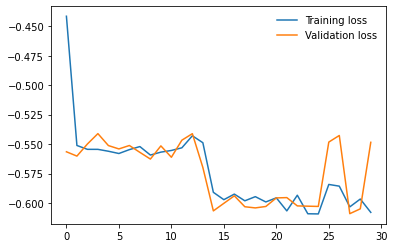

In [39]:
plt.plot(train_losses, label = "Training loss")
plt.plot(test_losses, label = "Validation loss")
plt.legend(frameon = False)